In [1]:
#importing essential libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="invalid value encountered in greater_equal")
warnings.filterwarnings("ignore", message="invalid value encountered in less_equal")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing data as csv file
df = pd.read_csv('breast-w_csv.csv')

In [3]:
df.replace('?',-99999,inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)

(699, 10)


In [5]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [6]:
df.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


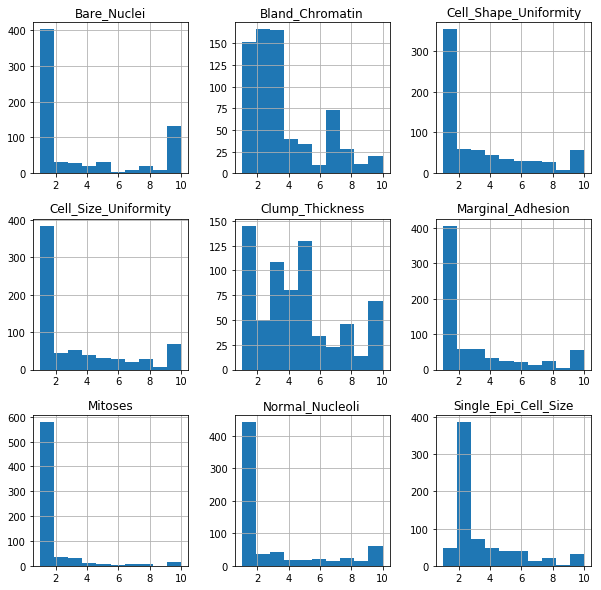

In [7]:
df.hist(figsize=(10,10))
plt.show()

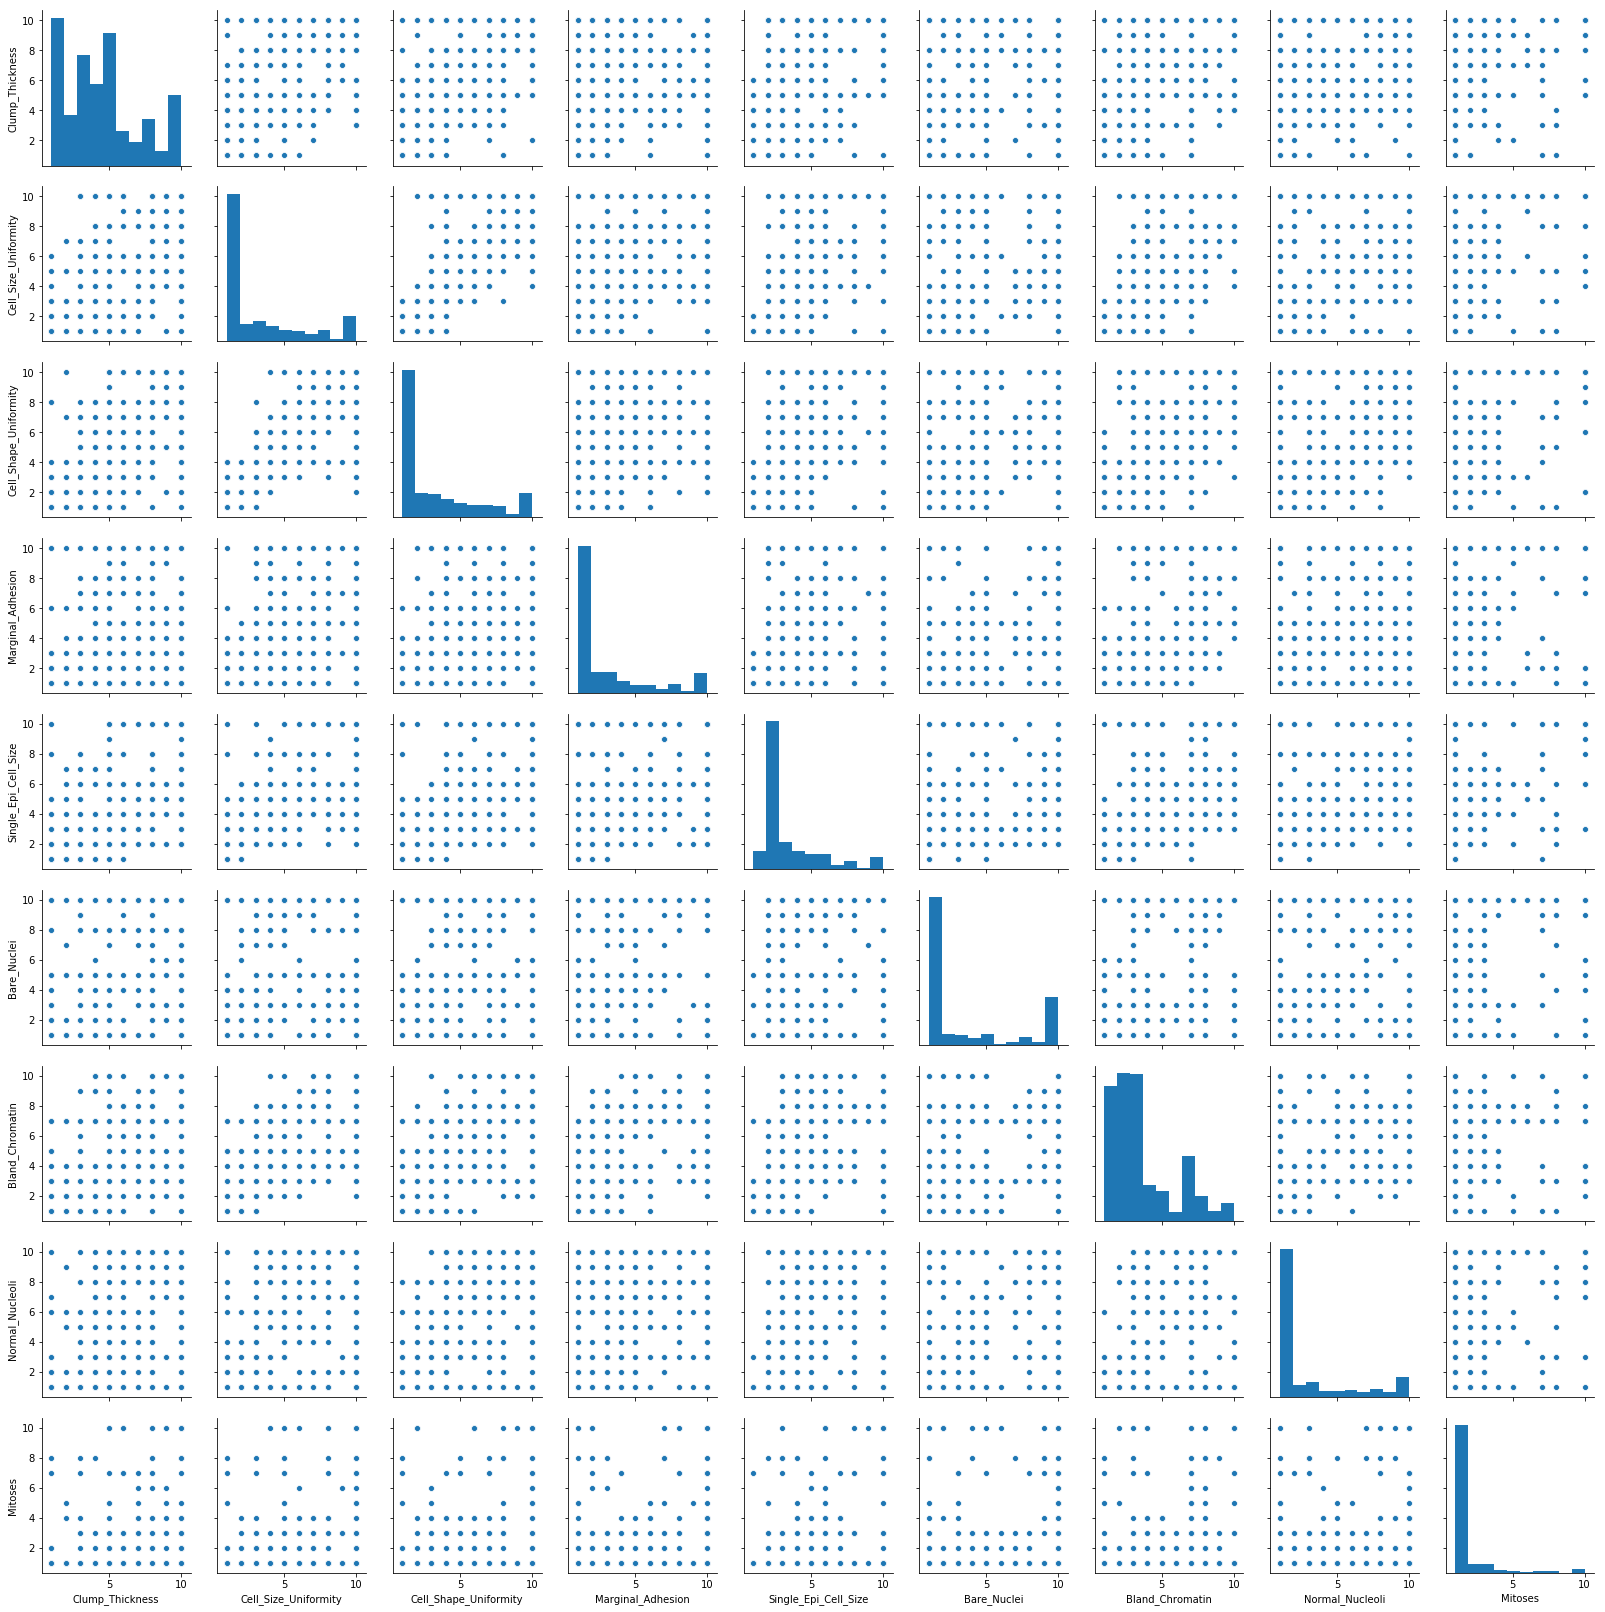

In [15]:
import seaborn as sns
sns.pairplot(df)


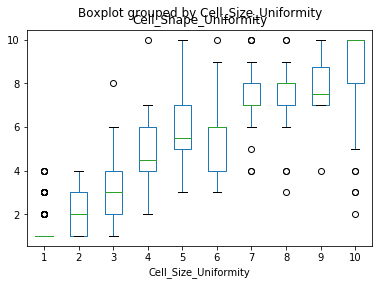

In [8]:
df.boxplot(by ='Cell_Size_Uniformity', column =['Cell_Shape_Uniformity'], grid = False) 

In [9]:
df.isnull().values.sum()

16

In [10]:
df.isnull().sum()

Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

In [11]:
import copy
df1  = df.copy()
df1 = df1.fillna(df1['Bare_Nuclei'].value_counts().index[0])

In [12]:
df1.isnull().sum()

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64

In [13]:
df1.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


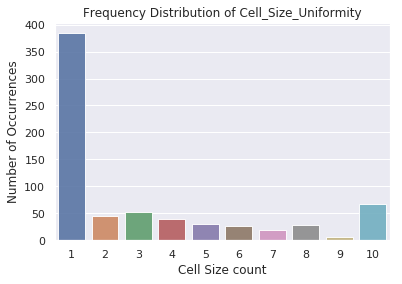

In [16]:
cellSize_count = df1['Cell_Size_Uniformity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(cellSize_count.index, cellSize_count.values, alpha=0.9)
plt.title('Frequency Distribution of Cell_Size_Uniformity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cell Size count', fontsize=12)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Class'] = encoder.fit_transform(df1['Class'])
df1.tail()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1
698,4,8,8,5,4,5.0,10,4,1,1


In [29]:
X = np.array(df1.drop(['Class'],1))
y = df1.loc[:,'Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
seed = 42
scoring = 'accuracy'

In [43]:
from sklearn import model_selection
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))

#Evaluate Both the models
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    model_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(model_results)
    names.append(name)
    output = "%s:  %f  (%f)" % (name, model_results.mean(), model_results.std())
    print(output)

NameError: name 'KNeighborsClassifier' is not defined